In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels import AbsorbingLS
import warnings
from linearmodels.iv.absorbing import AbsorbingEffectWarning

In [2]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.bart import BART

## Data Preprocessing

In [5]:
df = pd.read_csv("./Final Data/analysis_input.csv")
df['principal_city_binary'] = df['principal_city'] = np.where(df['principal_city'] == 999999, np.nan, np.where(df['principal_city'] == 0, 0, 1))
df['urban_rural_binary'] = np.where(df['urbanrural'].isin(['M', 'U']), 1, np.where(df['urbanrural'] == 'R', 0, np.nan))
# Merger Sample
df = df.dropna(subset=['overlap'])

## Bagging and Random Forests

There is not much change. Bagging and random forests cannot overfit by
increasing the number of trees, but can underfit if the number is too small.

Growing a random forest proceeds in exactly the same way, except that
we use a smaller value of the `max_features` argument. By default,
`RandomForestRegressor()`  uses $p$ variables when building a random
forest of regression trees (i.e. it defaults to bagging), and `RandomForestClassifier()` uses
$\sqrt{p}$ variables when building a
random forest of classification trees. Here we use `max_features=6`.

In [10]:
def ran_for(X_train, y_train):
    feature_names = X_train.columns
    n_feature = int(np.sqrt(len(feature_names)))

    RF_boston = RF(max_features=n_feature,
                n_estimators=500,
                random_state=0,
                    max_depth=5, 
                    n_jobs = -1).fit(X_train, y_train)

    feature_imp = pd.DataFrame(
        {'importance':RF_boston.feature_importances_,
        'variables':feature_names}
        )
    feature_imp = feature_imp.sort_values(by='importance', ascending=False)[0:50]

    # Plot the top 10 features (you can adjust this number)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='variables', data=feature_imp.head(10))  # Plot top 10 features

    # Add labels and title
    plt.title('Feature Importances in Random Forest')
    plt.xlabel('Importance')
    plt.ylabel('Feature')

    # Show the plot
    plt.tight_layout()
    plt.show()

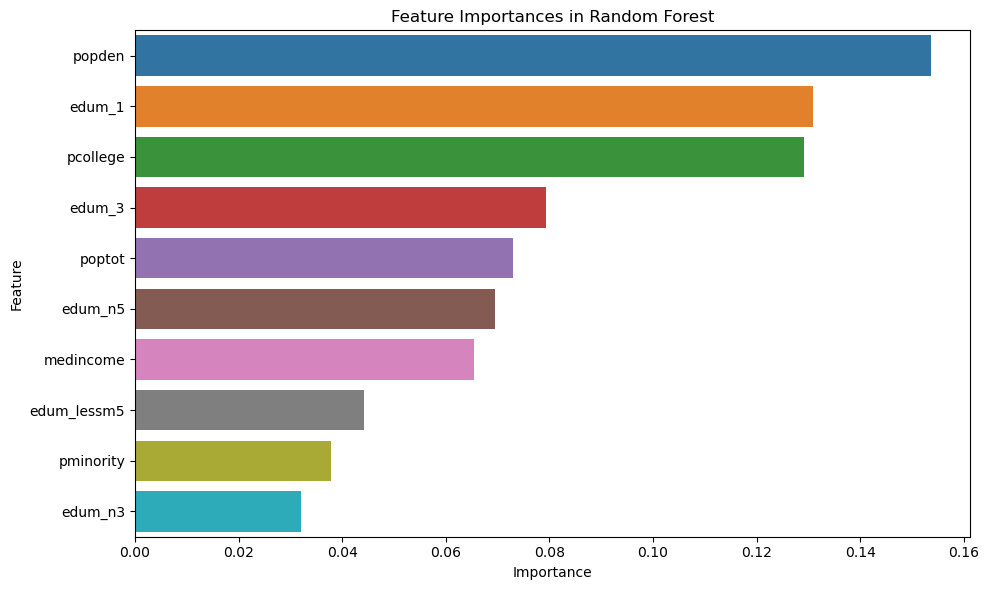

In [11]:
X_train = Boston[edum_vars + control_vars]
ran_for(X_train, Boston['branch_closures_tract'])

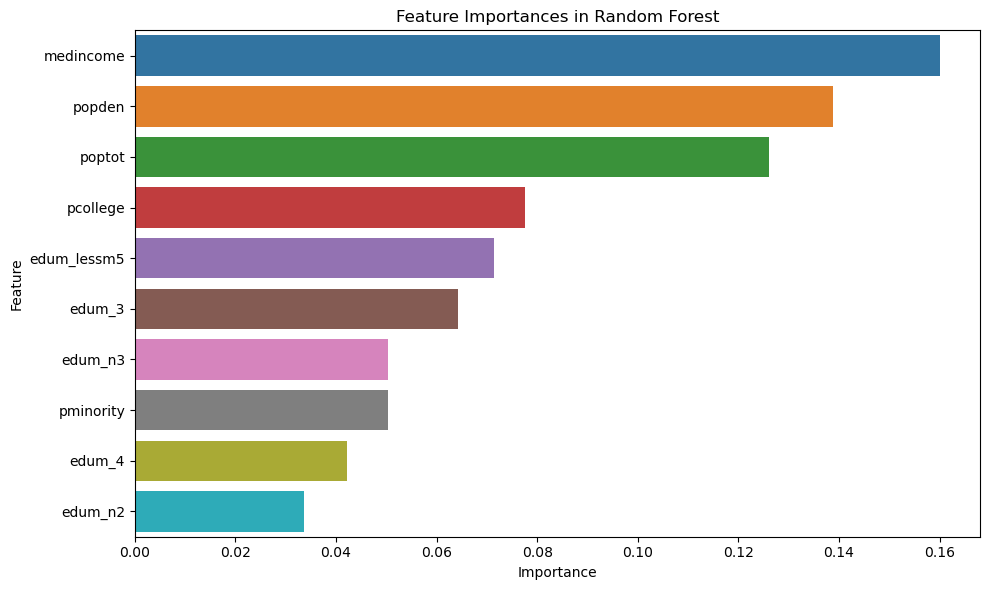

In [12]:
ran_for(X_train, Boston['total_branches_tract'])

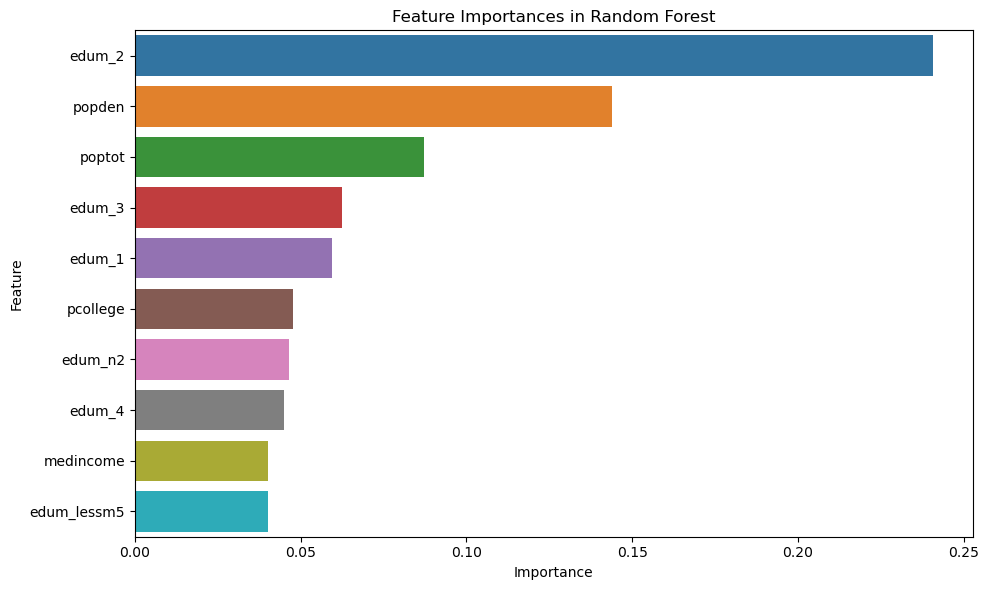

In [13]:
ran_for(X_train, Boston['sbl_total'])

## Bayesian Additive Regression Trees

In [17]:
bart_boston = BART(random_state=0, burnin=5, ndraw=30)
bart_boston.fit(X_train, Boston['branch_closures_tract'])
var_inclusion = pd.Series(bart_boston.variable_inclusion_.mean(0),
                               index=X_train.columns)
var_inclusion.sort_values(ascending=False)

total_branches_county       27.866667
edum_1                      14.700000
edum_3                      14.333333
edum_n3                     13.466667
edum_2                      13.066667
edum_n2                     12.433333
edum_5                      12.333333
edum_n5                     12.033333
edum_0                      11.900000
edum_4                      11.733333
edum_lessm5                 11.166667
popden                      11.133333
poptot                      10.933333
edum_n4                     10.700000
edum_great5                 10.066667
pminority                    9.633333
avg_branch_growth_county     9.366667
pcollege                     9.133333
medincome                    7.433333
dtype: float64

In [18]:
bart_boston = BART(random_state=0, burnin=5, ndraw=15)
bart_boston.fit(X_train, Boston['total_branches_tract'])
var_inclusion = pd.Series(bart_boston.variable_inclusion_.mean(0),
                               index=X_train.columns)
var_inclusion.sort_values(ascending=False)


total_branches_county       22.400000
poptot                      19.600000
edum_lessm5                 17.533333
medincome                   15.200000
edum_n4                     14.933333
edum_2                      14.866667
edum_n5                     14.733333
popden                      14.533333
pminority                   13.666667
edum_0                      13.600000
edum_1                      13.533333
edum_n2                     13.333333
edum_4                      13.266667
edum_3                      13.200000
edum_n3                     13.133333
avg_branch_growth_county    11.666667
edum_5                      10.666667
edum_great5                 10.600000
pcollege                    10.266667
dtype: float64

In [19]:
bart_boston = BART(random_state=0, burnin=5, ndraw=15)
bart_boston.fit(X_train, Boston['sbl_total'])
var_inclusion = pd.Series(bart_boston.variable_inclusion_.mean(0),
                               index=X_train.columns)
var_inclusion.sort_values(ascending=False)

total_branches_county       25.666667
edum_2                      18.400000
popden                      17.133333
edum_lessm5                 15.600000
edum_great5                 14.400000
poptot                      13.933333
edum_5                      13.400000
edum_n3                     12.866667
edum_1                      12.666667
edum_n5                     12.466667
edum_3                      12.133333
edum_0                      11.533333
edum_n4                     11.000000
edum_4                      10.933333
edum_n2                     10.266667
medincome                    8.933333
pminority                    8.866667
pcollege                     8.266667
avg_branch_growth_county     6.066667
dtype: float64